In [1]:
import sys
sys.path.append('../../Hallgerd/')

In [2]:
import numpy as np
import hallgerd
from hallgerd.core import Sequential
from hallgerd.layers import Dense, Conv2D
from gunnar.core import Device

In [3]:
import pylab as plt
from PIL import Image

In [4]:
img = np.asarray(Image.open('image.jpg')).T.astype(np.float32) / 255
img.shape

(3, 62, 59)

In [5]:
devices = Device.getDevices()
dnames = [d for d in devices]

print('Found devices:\n\t{}'.format('\n\t'.join(dnames)))
print('\nUsing ', dnames[0])
gpu = Device([devices[dnames[0]]], DTYPE=np.float32, CTS=32, IBS=2, TS=32, TSK=32, WPTM=4, WPTN=4)

Found devices:
	GeForce GTX 660

Using  GeForce GTX 660


In [6]:
original = img[0].copy().T
kernel = np.random.randn(3,3)
gx = gpu.image(original.flatten().reshape(-1,1), (59, 62), (1,))
gkernel = gpu.image(kernel.flatten().reshape(-1,1), (3, 3), (1,1))
gy = gx.conv2d(gkernel, padding=0).sigmoid()

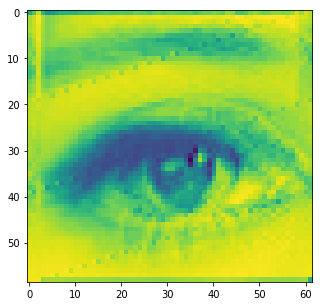

In [7]:
yt = gy.to_cpu()
yt = yt.reshape(gy.channels[0], gy.image_shape[0], gy.image_shape[1])

fig, ax = plt.subplots(figsize=(10,5), ncols=1)
ax.imshow(yt[0])
plt.show()

In [8]:
y = gy.to_cpu()

In [9]:
np.max(y), np.min(y)

(0.97434956, 0.3699699)

In [10]:
trainX = np.array([original.flatten(),]).T
trainY = np.array([y.reshape(original.shape).flatten(),]).T

In [14]:
model = Sequential(gpu, lr=3e-5, batch_size=1, epochs=50, loss='mse', dimages=(59,62,1), verbose=True)
model.add(Conv2D(1, 3, padding=0, activation='linear'))
model.add(Conv2D(3, 3, padding=0, activation='linear'))
model.add(Conv2D(3, 1, padding=0, activation='linear'))
model.fit(trainX, trainY)

loss = 18.19564437866211: 100%|██████████| 50/50 [00:08<00:00,  5.67it/s] 


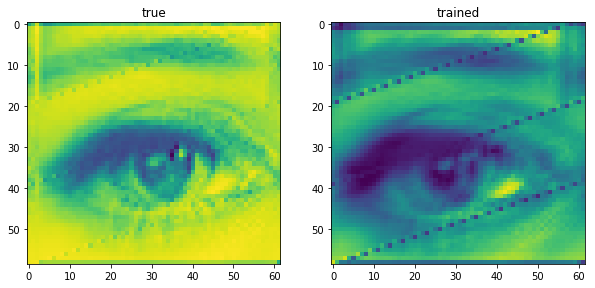

In [15]:
out = model(trainX)

fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].imshow(trainY.reshape(59,62))
ax[0].set_title('true')
ax[1].imshow(out.reshape(59,62))
ax[1].set_title('trained')
plt.show()

In [ ]:
np.linalg.norm(yp - yt)

In [ ]:
conv2d.weight.to_cpu().reshape(3,3), kernel

In [ ]:
np.linalg.norm(conv2d.weight.to_cpu().reshape(3,3) - kernel)

In [ ]:
np.max(yp), np.min(yp)